# План ноутбука:
- Виды кластеров
- Сравнение моделей кластеризации:
    - Kmeans
    - EM-алгоритм
    - Hierarchical Clustering
    - Mean Shift
    - DBSCAN

Какие бывают кластеры?

Populating the interactive namespace from numpy and matplotlib


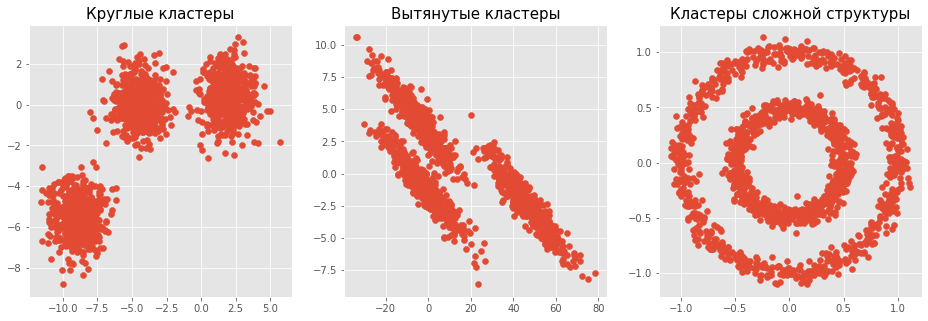

In [2]:
%pylab inline

# именно вот эта волшебная строчка делает наши графики
# довольно эстетичными с точки зрения ценителя хорошего дизайна
plt.style.use('ggplot')

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# эта строчка просто задает размер графика
plt.figure(figsize=(16, 5))

# тут мы генерируем облакоподобные кластера
X, y = make_blobs(n_samples=1500, centers=3, random_state=170)

# тут мы говорим, что хотим вывести 1-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(131)
# и выводим его
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.title(u"Круглые кластеры", fontsize=15)

# тут происходит страшная матричная магия, чтобы из круглях кластеров получить вытянутые
transformation = [[0.9, -0.9], [-9.9, 1.9]] # матрица преобразования
X_long = np.dot(X, transformation) # умножим на нее, чтобы растянуть кучки

# тут мы говорим, что хотим вывести 2-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(132)
plt.scatter(X_long[:, 0], X_long[:, 1], edgecolors='face')
plt.title(u"Вытянутые кластеры", fontsize=15)

# генерируем вложенные кружки
X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)

# тут мы говорим, что хотим вывести 3-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(133)
plt.scatter(X_circles[:, 0], X_circles[:, 1], edgecolors='face')
plt.title(u"Кластеры сложной структуры", fontsize=15)
plt.show()

# K-means

## Алгоритм k-means для задачи кластеризации

<img src="http://dendroid.sk/wp-content/uploads/2013/01/kmeansimg-scaled1000.jpg" width=400>

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги.

Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться. Т.е. пока полная сумма расстояний от каждой точки до центра ее кластера не будет похожа на константу (с наперед заданной точностью).

Если у вас есть интернет, то хорошо бы посмотреть визуализацию:
[Ссылка на визуализацию](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

<img src="https://github.com/fogside/Sirius/blob/b2e8ee648a6853122717dc123583819c702285d7/04_clustering/kmeans.gif?raw=true" width=600>

Анимация показывает как меняется полная сумма расстояний от каждой точки до центра ее кластера. Видно, что в конце эта сумма остается неизменной. На этом и заканчивается кластеризация.

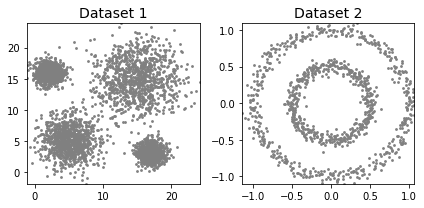

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

Dataset1
Cluster 0: 342
Cluster 1: 1006
Cluster 2: 1007
Cluster 3: 999


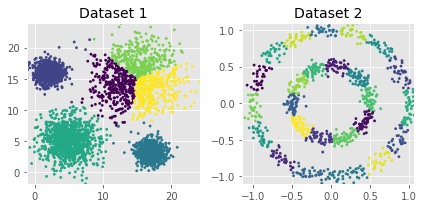

In [15]:
# implementing k-means clustering
kmeans_dataset1 = cluster.KMeans(n_clusters=6, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=25, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

K-means неплохо работает с Dataset1, но плохо работает с Dataset2. Фактически, эти два набора данных иллюстрируют сильные и слабые стороны k-средних. Алгоритм ищет и идентифицирует шаровые (по сути сферические) скопления. Если это предположение не выполняется, результаты модели могут быть недостаточными (или просто очень плохими).


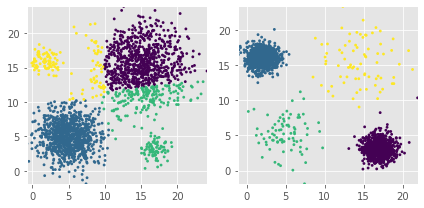

In [16]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset1, kmeans_dataset2,title1='', title2='')

# EM-алгоритм (Expectation–maximization algorithm)

<img src="https://dashee87.github.io/images/em_only.gif" width=600>

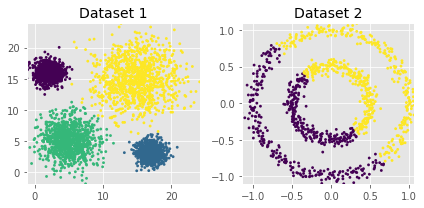

In [5]:
# implementing Expecation Maximistation (specifically Guassian Mixture Models)
em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(dataset2)
cluster_plots(dataset1, dataset2, em_dataset1.predict(dataset1),  em_dataset2.predict(dataset2))

# Hierarchical Clustering

<img src="https://dashee87.github.io/images/hierarch.gif" width=600>

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


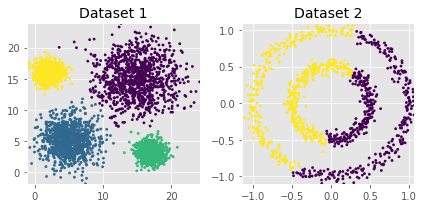

In [6]:
# implementing agglomerative (bottom up) hierarchical clustering
# we're going to specify that we want 4 and 2 clusters, respectively
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


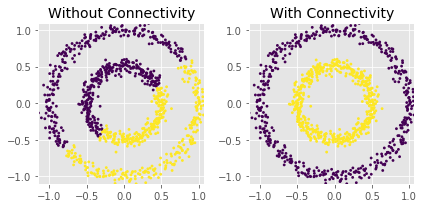

In [7]:
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset2_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)
cluster_plots(dataset2, dataset2,hc_dataset2,hc_dataset2_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

# Mean Shift

Подробно про Mean Shift: http://conf.nsc.ru/files/conferences/SDM-2017/416780/(S1)RylovSA.pdf

<img src="https://dashee87.github.io/images/mean_shift_0.gif" width=300>
<img src="https://dashee87.github.io/images/mean_shift_tutorial.gif" width=300>

Dataset1: 4 clusters
Dataset2: 8 clusters


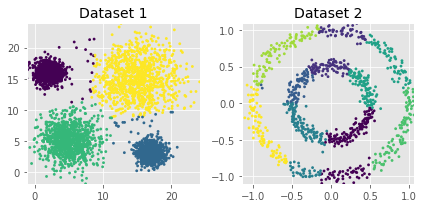

In [8]:
# implementing Mean Shift clustering in python
# auto-calculate bandwidths with estimate_bandwidth
bandwidths = [cluster.estimate_bandwidth(dataset, quantile=0.1) 
                         for dataset in [dataset1, dataset2]]
meanshifts = [cluster.MeanShift(bandwidth=band, bin_seeding=True).fit(dataset) 
              for dataset,band in zip([dataset1,dataset2],bandwidths)]
# print number of clusters for each dataset
print(*["Dataset"+str(i+1)+": "+ str(max(meanshifts[i].labels_)+1) + " clusters" 
        for i in range(2)], sep='\n')
# plot cluster output
cluster_plots(dataset1, dataset2, meanshifts[0].predict(dataset1), meanshifts[1].predict(dataset2))

<img src="https://dashee87.github.io/images/mean_shift_search.gif" width=600>

# DBSCAN

<img src="https://dashee87.github.io/images/DBSCAN_tutorial.gif" width=400>

Dataset1:
Number of Noise Points: 518 (4000)
Dataset2:
Number of Noise Points: 0 (1000)


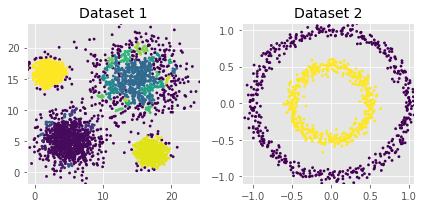

In [24]:
# implenting DBSCAN
dbscan_dataset1 = cluster.DBSCAN(eps=0.4, min_samples=5, metric='euclidean').fit_predict(dataset1)
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
dbscan_dataset2 = cluster.DBSCAN(eps=0.15, min_samples=5, metric='euclidean').fit_predict(dataset2)
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)

<img src="https://dashee87.github.io/images/DBSCAN_search.gif" width=600>